# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [115]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Binarizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
import scipy.misc
from scipy import ndimage
import warnings
warnings.filterwarnings("ignore")

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [3]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

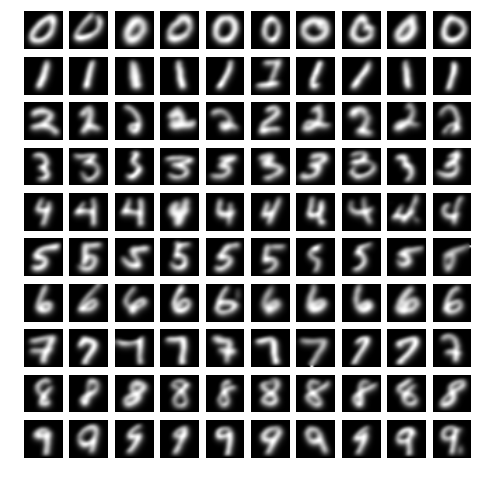

In [118]:
#def P1(num_examples=10):

### STUDENT START ###
# set up the plot figure with gray colormap and size of 8 inches X 8 inches
plt.rc('image', cmap='gray')
plt.rc('figure', figsize=[8,8])
fig = plt.figure()

# get a list with indices of data with labels 0 through 9
gridsz = 10
gridsq = gridsz * gridsz
indexdata = np.empty(gridsq)

for i in range(0, gridsz):
    count = 0
    while(count < gridsz):
        r = np.random.randint(0, 60000)
        if ((int(train_labels[r])) == i):
            indexdata[((i*10)+count)]=r
            count=count+1

# plot a 10 X 10 grid with image data to visualize 10 examples of each digit
for i in range(0, gridsq):
    ax = plt.subplot(gridsz, gridsz, i+1) 
    ax.set_axis_off()
    mat = np.reshape(train_data[(indexdata[i])], (28, 28))
    ax.imshow(mat)
plt.show()


### STUDENT END ###

#P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [119]:
#def P2(k_values):   ######  PENDING: Which is the most difficult digit ########

### STUDENT START ###
#initialize the values of k to be used in the k-nearest neighbors
# using the order 9, 7, 5, 3, 1, so the accuracies from k=1 can be used in P3
kparam=[9,7,5,3,1]

# execute the nearest neighbor classifier
for k in kparam:
    clf = KNeighborsClassifier(k)
    # Train the model with the mini training data set of 1000 records
    clf.fit(mini_train_data, mini_train_labels)
    # Make predictions for the data in dev dataset 
    prediction = clf.predict(dev_data)
    # Compare predicted labels with actual labels
    accuracy=clf.score(dev_data, dev_labels)
    print ("Predicted Nearest Neighbor accuracy for k value of "+str(k)+" is "+str(accuracy))

print("Classification report for classifier %s:\n%s\n"% (clf, classification_report(dev_labels, prediction)))
    
### STUDENT END ###

#k_values = [1, 3, 5, 7, 9]
#P2(k_values)

Predicted Nearest Neighbor accuracy for k value of 9 is 0.863
Predicted Nearest Neighbor accuracy for k value of 7 is 0.875
Predicted Nearest Neighbor accuracy for k value of 5 is 0.877
Predicted Nearest Neighbor accuracy for k value of 3 is 0.882
Predicted Nearest Neighbor accuracy for k value of 1 is 0.87
Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform'):
             precision    recall  f1-score   support

        0.0       0.88      0.97      0.92        99
        1.0       0.94      0.98      0.96       105
        2.0       0.98      0.82      0.89       102
        3.0       0.78      0.81      0.80        86
        4.0       0.91      0.76      0.83       104
        5.0       0.92      0.88      0.90        91
        6.0       0.92      0.93      0.92        98
        7.0       0.83      0.89      0.86       113
        8.0

ANSWER: F-1 score is a good parameter to assess the difficult digit. The digit with the least F1-score is 9. Hence 9 is the most difficult digit to classify with the Nearest Neighbors algorithm

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [120]:
#def P3(train_sizes, accuracies):

### STUDENT START ###
train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
clf = KNeighborsClassifier(1)
accuracies = []

for train_size in train_sizes:
    # Train the model with the training data set 
    shuffle = np.random.permutation(np.arange(train_data.shape[0]))
    p3_data, p3_label = train_data[shuffle], train_labels[shuffle]

    p3_data, p3_label = p3_data[:train_size], p3_label[:train_size]
    
    starttime = time.time()
    clf.fit(p3_data, p3_label)
    # Make predictions for the data in dev dataset 
    prediction = clf.predict(dev_data)
    endtime = time.time()
    # Compare predicted labels with actual labels
    accuracy = clf.score(dev_data, dev_labels)
    accuracies.append(accuracy)
    print ("Predicted Nearest Neighbor accuracy for a training size of "+str(train_size)+" records is "+str(accuracy))
    print ("Time needed for prediction for a training size of "+str(train_size)+" records is "+str(endtime-starttime)+" seconds")

#print(train_sizes)
#print(accuracies)
### STUDENT END ###

#train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
#accuracies = []
#P3(train_sizes, accuracies)

Predicted Nearest Neighbor accuracy for a training size of 100 records is 0.693
Time needed for prediction for a training size of 100 records is 0.12508940696716309 seconds
Predicted Nearest Neighbor accuracy for a training size of 200 records is 0.8
Time needed for prediction for a training size of 200 records is 0.29172396659851074 seconds
Predicted Nearest Neighbor accuracy for a training size of 400 records is 0.863
Time needed for prediction for a training size of 400 records is 0.5663328170776367 seconds
Predicted Nearest Neighbor accuracy for a training size of 800 records is 0.889
Time needed for prediction for a training size of 800 records is 1.1264405250549316 seconds
Predicted Nearest Neighbor accuracy for a training size of 1600 records is 0.896
Time needed for prediction for a training size of 1600 records is 2.3544373512268066 seconds
Predicted Nearest Neighbor accuracy for a training size of 3200 records is 0.926
Time needed for prediction for a training size of 3200 re

(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

In [121]:
#def P4(): ######  PENDING: Transformation ########

### STUDENT START ###
#Fit a linear regression model 
# Use accuracies from P3
XX = [[100],[200],[400],[800],[1600],[3200],[6400],[12800],[25000]]
regr = LinearRegression(normalize=True)
regr.fit(XX,accuracies)

X_test = [[60000]]
print(regr.predict(X_test))

### STUDENT END ###

#P4()

[ 1.21002675]


ANSWER: 
What does it predict for n=60000? 
    When you fit a regression model with no transformations,
        the regression line predicts a accurancy value of 1.21 or 121%
        the regression coefficient is 7.18139980e-06

What's wrong with using regression here? 
    This is incorrect since the accuracy percentage is a value with limits from 0 to 100%. 

Can you apply a transformation that makes the predictions more reasonable?
    Apply a scaling/normalizing (with minmaxscaler) transformation of the response variable to a value between 0 and 1
    

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

[[ 96   0   3   3   0   1   3   1   1   1]
 [  0 103   2   0   0   0   2   1   2   0]
 [  0   0  84   1   0   0   0   1   0   0]
 [  1   0   3  70   0   5   0   2   7   2]
 [  0   0   0   0  79   0   0   1   1   6]
 [  0   0   1   1   0  80   2   0   2   1]
 [  2   1   0   0   4   1  91   0   0   0]
 [  0   0   6   3   2   0   0 101   1   8]
 [  0   0   3   5   1   3   0   1  78   0]
 [  0   1   0   3  18   1   0   5   4  88]]
Predicted Nearest Neighbor accuracy for k value of 1000 is 0.87


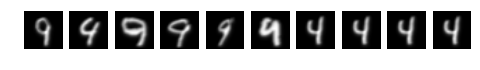

In [123]:
#def P5():  

### STUDENT START ###
clf = KNeighborsClassifier(1)
# Train the model with the mini training data set 
clf.fit(mini_train_data, mini_train_labels)
# Make predictions for the data in dev dataset 
prediction = clf.predict(dev_data)
# Compare predicted labels with actual labels
accuracy=clf.score(dev_data, dev_labels)

# Print the confusion matrix
class1 = [0,1,2,3,4,5,6,7,8,9]
cm = confusion_matrix(prediction, dev_labels, class1)
print(cm)
print ("Predicted Nearest Neighbor accuracy for k value of "+str(k)+" is "+str(accuracy))

# Gather 10 images with mistakes. In this case, where the PREDICTED_DIGIT = 4 and ACTUAL_LABEL = 9
num_display = 10
count = 0
k = 0
PREDICTED_DIGIT = 4
ACTUAL_LABEL = 9
indexdata1 = np.empty(gridsq)

while ((count < num_display) and (k<len(prediction))):
    if(prediction[k] != dev_labels[k]):
        if(int(prediction[k]) == 4 and int(dev_labels[k]) == 9):
            indexdata1[count]=k
            count = count+1
    k = k+1

# Display the images where there was a mistake (PREDICTED_DIGIT = 4 and ACTUAL_LABEL = 9)
for i in range(0, num_display):
    ax = plt.subplot(1, num_display, i+1) 
    ax.set_axis_off()
    mat = np.reshape(dev_data[(indexdata1[i])], (28, 28))
    ax.imshow(mat)

    
### STUDENT END ###

#P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [65]:
#def P6():
    
### STUDENT START ###
#######  THIS PIECE OF CODE TAKES A LOOOOOONG TIME TO EXECUTE DUE TO THE BLURRING FUNCTION ################

# Write a function that returns a vector with blurred values given a regular vector of size 784
#    Implement a simplified Gaussian blur by just using the 8 neighboring pixels: 
#    the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values
# For example for a pixel at position (3,3) the pixel values from [(2,2),(2,3),(2,4),(3,2),(3,3),(3,4),(4,2),(4,3),(4,4)]
def funcgaussianblur(datavector):
    # Reshape the vector in to a 28 X 28 matrix
    datamat = np.reshape(datavector, (28, 28))
    blurdatamat = np.reshape(datavector, (28, 28))
    # Cycle through the data - by the rows
    for rowindex in range(0,27):
        for colindex in range(0,27):
            val = 0
            n = 0
            # Get the values from the previous row
            if (rowindex-1)>=0:
                if(colindex-1)>=0:
                    val = val + datamat[rowindex-1][colindex-1]
                    n=n+1
                val = val + datamat[rowindex-1][colindex]
                n=n+1
                if(colindex+1)<=27:
                    val = val + datamat[rowindex-1][colindex+1]
                    n=n+1
            # Add the values from the current row
            if(colindex-1)>=0:
                val = val + datamat[rowindex][colindex-1]
                n=n+1
            val = val + datamat[rowindex][colindex]
            n=n+1
            if(colindex+1)<=27:
                val = val + datamat[rowindex][colindex+1]
                n=n+1
            # Get the values from the next row
            if (rowindex+1)<=27:
                if(colindex-1)>=0:
                    val = val + datamat[rowindex+1][colindex-1]
                    n=n+1
                val = val + datamat[rowindex+1][colindex]
                n=n+1
                if(colindex+1)<=27:
                    val = val + datamat[rowindex+1][colindex+1]
                    n=n+1
            # Compute the blurred data value
            blurdatamat[rowindex][colindex] = val/n
    # Reshape the 28 X 28 matrix back to a vector of size 784
    blurdatavector = np.reshape(blurdatamat, (1, 784))
    return blurdatavector
  
#preprocess the training data
blurtrain_data = train_data
for i in range(0, train_data.shape[0]):
    blurtrain_data[i] = funcgaussianblur(train_data[i])

clf = KNeighborsClassifier()
clf.fit(blurtrain_data, train_labels)
# Make predictions for the data in dev dataset 
prediction = clf.predict(dev_data)
    
# Compare predicted labels with actual labels
accuracy = clf.score(dev_data, dev_labels)
print ("Predicted Nearest Neighbor accuracy with preprocessing just training data is "+str(accuracy))

#preprocess the dev data
blurdev_data = dev_data
for i in range(0, dev_data.shape[0]):
    blurdev_data[i] = funcgaussianblur(dev_data[i])

clf = KNeighborsClassifier()
clf.fit(train_data, train_labels)
# Make predictions for the data in dev dataset 
prediction = clf.predict(blurdev_data)
    
# Compare predicted labels with actual labels
accuracy = clf.score(blurdev_data, dev_labels)
print ("Predicted Nearest Neighbor accuracy with preprocessing just dev data is "+str(accuracy))

#preprocess both dev and training data
clf = KNeighborsClassifier()
clf.fit(blurtrain_data, train_labels)
# Make predictions for the data in dev dataset 
prediction = clf.predict(blurdev_data)
    
# Compare predicted labels with actual labels
accuracy = clf.score(blurdev_data, dev_labels)
print ("Predicted Nearest Neighbor accuracy with preprocessing both training and dev data is "+str(accuracy))

### STUDENT END ###

#P6()

Predicted Nearest Neighbor accuracy with preprocessing both training and dev data is 0.969


ANSWER:
Predicted Nearest Neighbor accuracy with preprocessing just training data is 0.962

Predicted Nearest Neighbor accuracy with preprocessing just dev data is 0.969

Predicted Nearest Neighbor accuracy with preprocessing both training and dev data is 0.969

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [132]:
#def P7():

### STUDENT START : ###
# BernoulliNB
# Mapping the pixel values to either 0 or 1; If the value is less than 0.1 then use 0, else 1
BNBtrain_data = Binarizer(0.1).transform(train_data)
BNBdev_data = Binarizer(0.1).transform(dev_data)
BNBclf = BernoulliNB()
# Train the classifier with the training data
BNBclf.fit(BNBtrain_data, train_labels)
BNBprediction = BNBclf.predict(BNBdev_data)
# Compare predicted labels with actual labels
BNBaccuracy = BNBclf.score(BNBdev_data, dev_labels)
print("Predicted accuracy for BernoulliNB is "+str(BNBaccuracy))

# MultinomialNB
# Mapping the pixel values to 0, 1 or 2; If the value is less than 0.1 then use 0, if the value is betwen 0.1 and 0.9 use 1 else 2
MNBtrain_data = train_data
binplace = np.digitize(MNBtrain_data, bins=[0.1, 0.9, 1.0])
MNBtrain_data[np.where(binplace == 1)] = 0
MNBtrain_data[np.where(binplace == 2)] = 1
MNBtrain_data[np.where(binplace == 3)] = 2

MNBdev_data = dev_data
binplace1 = np.digitize(MNBdev_data, bins=[0.1, 0.9, 1.0])
MNBdev_data[np.where(binplace1 == 1)] = 0
MNBdev_data[np.where(binplace1 == 2)] = 1
MNBdev_data[np.where(binplace1 == 3)] = 2

# Train the classifier with the training data
MNBclf = MultinomialNB()
MNBclf.fit(MNBtrain_data, train_labels)
MNBprediction = MNBclf.predict(MNBdev_data)
# Compare predicted labels with actual labels
MNBaccuracy = MNBclf.score(MNBdev_data, dev_labels)
print("Predicted accuracy for MultinomialNB is "+str(MNBaccuracy))

### STUDENT END ###

#P7()

Predicted accuracy for BernoulliNB is 0.458
Predicted accuracy for MultinomialNB is 0.595


ANSWER:
Predicted accuracy for BernoulliNB is 0.458
Predicted accuracy for MultinomialNB is 0.595

As we collapse the feature values for BernoulliNB to 0 or 1 the feature becomes less sensitive. 
As the feature values increase to 0, 1, 2 (three distinct values as opposed to two) it becomes more sensitive. Hence the accuracy of the MultinomialNB is higher than that of BernoulliNB. 

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [133]:
#def P8(alphas): 

### STUDENT START ###
# Set up the values of alpha to be used in GridSearchCV
parameters = [{'alpha':[0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}]

# Run the BernoulliNB classifier over the alpha values
CVclf = GridSearchCV(BernoulliNB(binarize=0.0, class_prior=None, fit_prior=True), parameters, cv=10, scoring='f1_weighted')
CVclf.fit(train_data,train_labels) 

# Print the best estimator
print(CVclf.best_estimator_)
# Print the best score
print(CVclf.best_score_)
# Print the best alpha
print(CVclf.best_params_)
# Print the grid scores for all alpha values
print(CVclf.grid_scores_)


### STUDENT END ###

#alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
#nb = P8(alphas)

BernoulliNB(alpha=0.0001, binarize=0.0, class_prior=None, fit_prior=True)
0.725182051454
{'alpha': 0.0001}
[mean: 0.01781, std: 0.00002, params: {'alpha': 0.0}, mean: 0.72518, std: 0.01937, params: {'alpha': 0.0001}, mean: 0.72513, std: 0.01936, params: {'alpha': 0.001}, mean: 0.72507, std: 0.01939, params: {'alpha': 0.01}, mean: 0.72489, std: 0.01944, params: {'alpha': 0.1}, mean: 0.72482, std: 0.01948, params: {'alpha': 0.5}, mean: 0.72470, std: 0.01951, params: {'alpha': 1.0}, mean: 0.72453, std: 0.01942, params: {'alpha': 2.0}, mean: 0.72353, std: 0.01892, params: {'alpha': 10.0}]


ANSWER:
What is the best value for alpha? 
    Alpha value of 0.0001 is the best estimator

What is the accuracy when alpha=0? 
    Accuracy is 0.01781 when alpha = 0. 

Is this what you'd expect?
    With no smoothing  and a binary feature set the accuracy is expected to be low. But an accuracy of 0.017 is too low.
    In addition as smoothing is increased, there is not much improvement in the accuracy. This is counterintuitive.

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [150]:
#def P9():   ##########  PENDING: Try to diagnose the problem  ###########

### STUDENT END ###
GNBclf = GaussianNB()
param = GNBclf.fit(train_data, train_labels)
GNBprediction1 = GNBclf.predict(dev_data)
# Compare predicted labels with actual labels
GNBaccuracy1 = GNBclf.score(dev_data, dev_labels)
print("Predicted accuracy for GaussianNB is "+str(GNBaccuracy1))
#print("theta", GNBclf.theta_[np.argmax(GNBclf.theta_)])
#print("sigma", GNBclf.sigma_)
#print(GNBclf.sigma_.shape)

import sklearn.preprocessing as pp

scaledtrain_data = pp.normalize(train_data)
scaleddev_data = pp.normalize(dev_data)
GNBclf.fit(scaledtrain_data, train_labels)
GNBprediction2 = GNBclf.predict(scaleddev_data)
GNBaccuracy2 = GNBclf.score(scaleddev_data, dev_labels)
print("Predicted accuracy for GaussianNB with normalization is "+str(GNBaccuracy2))

### STUDENT END ###

#gnb = P9()

Predicted accuracy for GaussianNB is 0.409
Predicted accuracy for GaussianNB with normalization is 0.176


ANSWER:

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

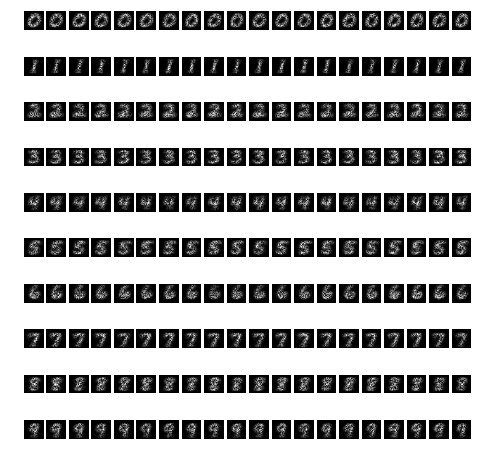

In [51]:
#def P10(num_examples):

### STUDENT START ###
# Training the BernoulliNB classifier with training data
BNBtrain_data = Binarizer(0.1).transform(train_data)
BNBdev_data = Binarizer(0.1).transform(dev_data)
BNBclf = BernoulliNB()
# Make predictions
BNBclf.fit(BNBtrain_data, train_labels)

# Generate image data based on the trained data
num_features = 784
# Number of samples per digit
num_samples = 20
# Number of digits
num_digits = 10
# Initialize a ndarray with zeroes
gen_data = np.zeros(((num_samples*num_digits), num_features))

# For each digit 0 through 9
for digit in range (0, num_digits):
    # Generate image data for 20 samples
    for sample in range (0, num_samples):
        # Generate the 784 feature values
        for feature in range (0, num_features):
            continuewithfeature = True
            # Get the estimated probability of each pixel
            prob = np.exp(BNBclf.feature_log_prob_[digit][feature])
            while(continuewithfeature):
                # The feature data is randomly generated
                r = np.random.rand()
                # As long as the random value is less than the estimated probability of each pixel, then use it
                # Otherwise generate another one
                if(r < prob):
                    gen_data[((digit*num_samples)+sample)][feature] = r
                    continuewithfeature = False
        # Plot the data  with the generated dataset
        ax = plt.subplot(num_digits, num_samples, (((digit*num_samples)+sample)+1))
        ax.set_axis_off()
        mat = np.reshape(gen_data[((digit*num_samples)+sample)], (28, 28))
        ax.imshow(mat)

### STUDENT END ###

#P10(20)

ANSWER:
How do the generated digits compare to the training digits?
    The generated digits look to be sparser compared to the training digits

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [116]:
#def P11(buckets, correct, total):
    
### STUDENT START ###
buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

# Set up the Bernoulli Naive Bayes classifier
BNBclf = BernoulliNB(alpha = 0.9)
# Train the classifier with training data
BNBclf.fit(BNBtrain_data, train_labels)

# For each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters
for num in range (0, dev_data.shape[0]):
    # Get the predicted digit for each data in the dataset
    predicteddigit = int(BNBclf.predict(dev_data[num]))
    # Get the maximum posterior for each data in the dataset
    posteriorprob = BNBclf.predict_proba(dev_data[num])
    # Determine the bucket of the proterior probability
    bucketindex = np.digitize(posteriorprob[0][predicteddigit], buckets, right=False)
    # Compute the 'totals' and 'correctness'
    total[bucketindex-1] = (total[bucketindex-1])+1
    if (dev_labels[num] == predicteddigit):
        correct[bucketindex-1] = (correct[bucketindex-1])+1

# Print the accuracy within each bucket of posterior probability
for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): 
        accuracy = correct[i] / total[i]
    print('p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy))
                
### STUDENT END ###

#buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
#correct = [0 for i in buckets]
#total = [0 for i in buckets]

#P11(buckets, correct, total)

#for i in range(len(buckets)):
#    accuracy = 0.0
#    if (total[i] > 0): accuracy = correct[i] / total[i]
#    print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)

p(pred) <= 0.5000000000000    total =   7    accuracy = 0.143
p(pred) <= 0.9000000000000    total =  29    accuracy = 0.207
p(pred) <= 0.9990000000000    total =  75    accuracy = 0.107
p(pred) <= 0.9999900000000    total =  40    accuracy = 0.175
p(pred) <= 0.9999999000000    total =  44    accuracy = 0.091
p(pred) <= 0.9999999990000    total =  46    accuracy = 0.043
p(pred) <= 0.9999999999900    total =  50    accuracy = 0.080
p(pred) <= 0.9999999999999    total =   0    accuracy = 0.000
p(pred) <= 1.0000000000000    total = 709    accuracy = 0.150


ANSWER: Based on the excessive number of items in the bucket with probability = 1, BernoulliNB is a overconfident model

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [18]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()